In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Read the dataset
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
#Display the first 6 rows of the dataframe
df.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


In [4]:
#Drop the 'User ID' column as it is not needed for classification
df.drop(["User ID"],axis=1,inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
#Convert the 'Gender' column to numerical values (0 for Male, 1 for Female)
df['Gender'] = df['Gender'].apply(lambda  x: 1 if x == 'Female' else 0)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [6]:
#Find any Nulls values in the dataframe
df.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [7]:
#the shape of the dataframe
df.shape

(400, 4)

In [8]:
#Display the data types of each column in the dataframe
df.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [9]:
#Define features (x) and target variable (y)
x = df.iloc[:, [0,1,2]]
y = df.iloc[:, 3]

In [10]:
#Display the first 5 rows of the features (x)
x.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [ ]:
#Display the first 5 rows of the target variable (y)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [11]:
#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [12]:
#Feature Scaling
scaledX = StandardScaler()
x_train = scaledX.fit_transform(x_train)
x_test = scaledX.transform(x_test)

In [13]:
#Train the SVM model linear kernel
model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
#Prediction on the testing set
y_pred = model.predict(x_test)
print("Predicted values:")
print(y_pred)

#Calculate, print the model accuracy
print("\nModel Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")

Predicted values:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]

Model Accuracy: 89.0 %


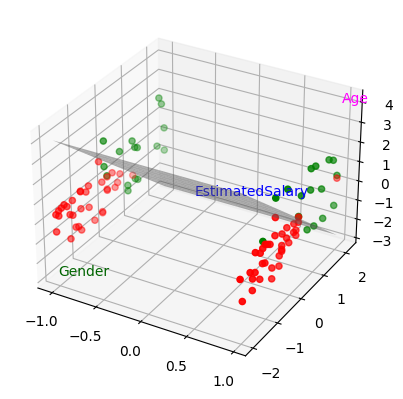

In [15]:
#Plot data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], x_test[y_test == 0, 2], c='Red', label='Not Purchased')
ax.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], x_test[y_test == 1, 2], c='Green', label='Purchased')

#Create the hyperplane with coefficients, bias
coefficients = model.coef_[0]
bias = model.intercept_
z = (-coefficients[0] * x_test[:, 0] - coefficients[1] * x_test[:, 1] - bias) / coefficients[2]

#Plot the hyperplane with meshgrid
X, Y = np.meshgrid(np.linspace(x_test[:, 0].min(), x_test[:, 0].max(), 10),
                     np.linspace(x_test[:, 1].min(), x_test[:, 1].max(), 10))

#Calculate the Z values
Z = (-coefficients[0] * X - coefficients[1] * Y - bias) / coefficients[2]

#Plot the hyperplane
ax.plot_surface(X, Y, Z, alpha=0.5, color='darkgray')


#labels to the axes
ax.text(x_test[:, 0].min(), x_test[:, 1].min(), Z.min(), 'Gender', color='Darkgreen')
ax.text(x_test[:, 0].max(), x_test[:, 1].max(), Z.max(), 'Age', color='magenta')
ax.text(x_test[:, 0].mean(), x_test[:, 1].mean(), Z.mean(), 'EstimatedSalary', color='blue')

#Show the hyperplane
plt.show()

In [16]:
#Define a new instance for prediction (unseen dataset)
New_Instance1 = [1, 30, 208754]

#Predict the class for the new instance
result1 = model.predict(scaledX.transform([New_Instance1]))

#Print the predicted class
if result1[0] == 1:
   print('class: Purchased')
else:
   print('class: Not purchased ')

class: Purchased


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
#Define a new instance for prediction (unseen dataset)
new_instance2 = [0, 38, 29871]

#Predict the class for the new instance
result2 = model.predict(scaledX.transform([new_instance2]))

#Print the predicted class
if result2[0] == 1:
   print('class: Purchased')
else:
   print('class: Not purchased ')

class: Not purchased 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
